# Basic classification: Classify images of clothing

This guide trains a neural network model to classify images of clothing, like sneakers and shirts.

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


#Importing Fashion MNIST Dataset

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

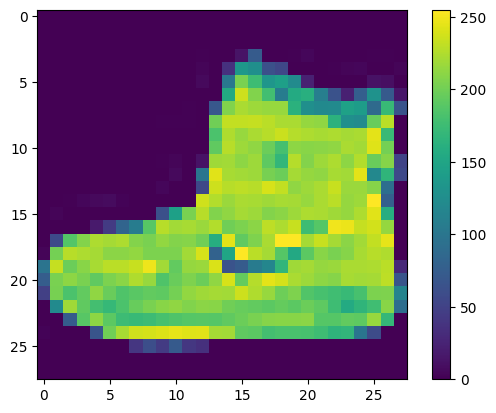

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

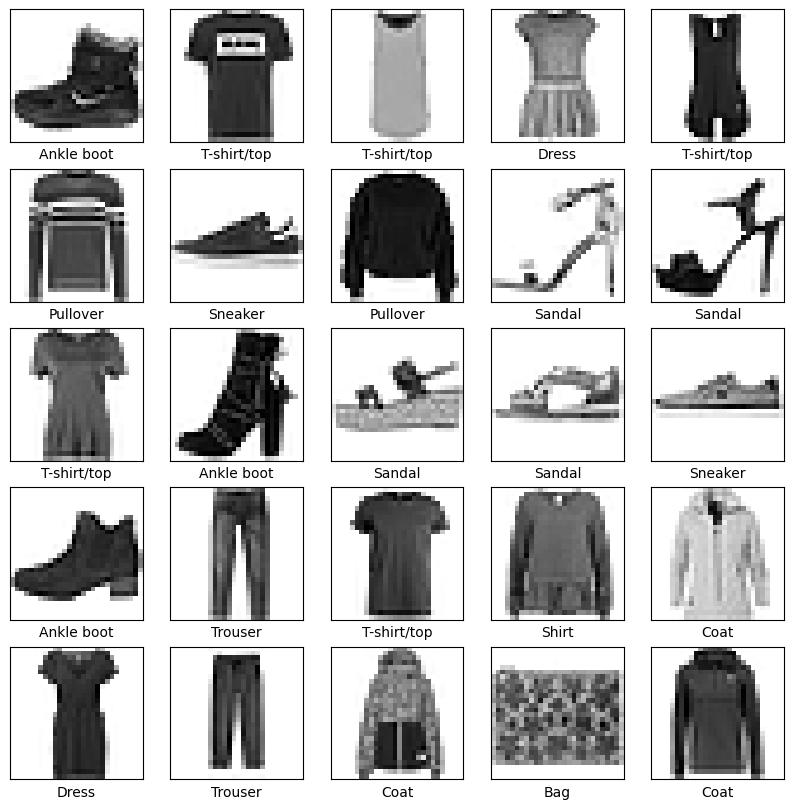

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=19)

Epoch 1/19
1875/1875 [==============================] - 20s 10ms/step - loss: 0.5029 - accuracy: 0.8227
Epoch 2/19
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3775 - accuracy: 0.8638
Epoch 3/19
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3397 - accuracy: 0.8765
Epoch 4/19
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3141 - accuracy: 0.8843
Epoch 5/19
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2951 - accuracy: 0.8920
Epoch 6/19
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2820 - accuracy: 0.8963
Epoch 7/19
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2688 - accuracy: 0.8997
Epoch 8/19
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2570 - accuracy: 0.9057
Epoch 9/19
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2476 - accuracy: 0.9080
Epoch 10/19
1875/1875 [==============================] - 11s 6ms/step - loss: 0.

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest Loss:',test_loss)

313/313 - 1s - loss: 0.3580 - accuracy: 0.8826 - 692ms/epoch - 2ms/step

Test accuracy: 0.8826000094413757

Test Loss: 0.35804134607315063


In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [ ]:
predictions[0]

array([1.9043050e-11, 1.0466932e-13, 2.8402938e-10, 3.2475254e-13,
       2.9555483e-12, 2.7515649e-05, 5.8986827e-10, 1.2099678e-03,
       2.4413208e-12, 9.9876249e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])


9

In [ ]:
test_labels[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

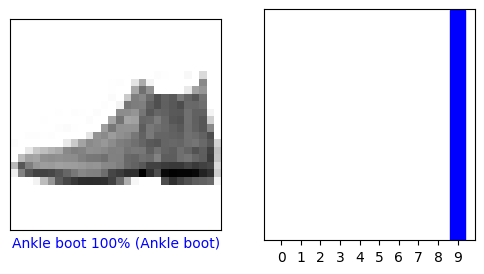

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

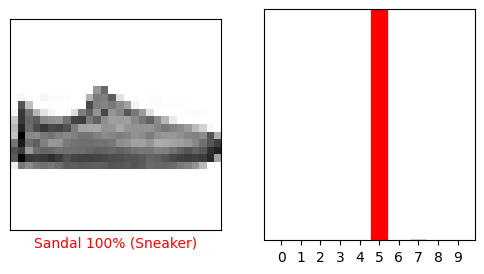

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

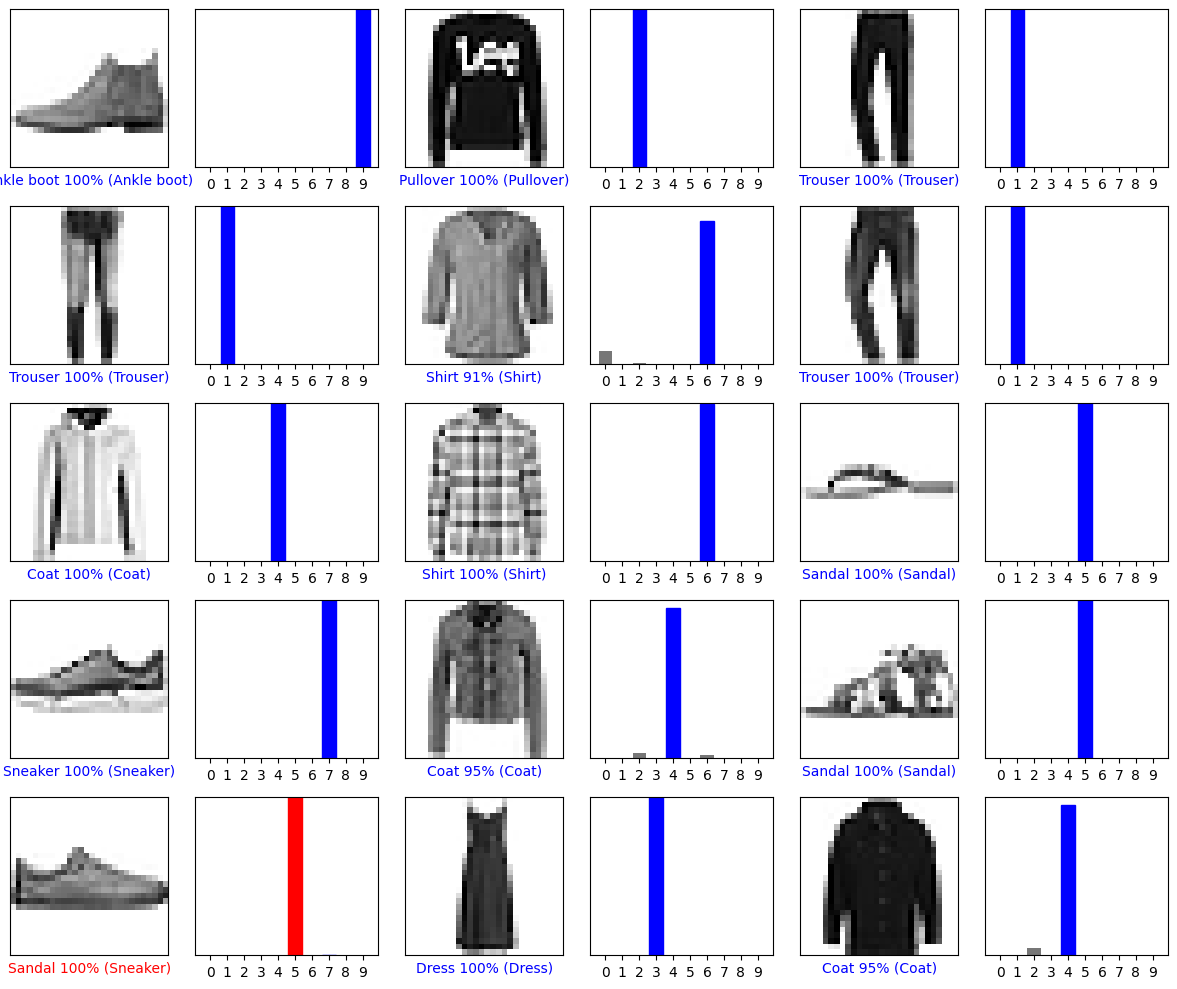

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 24ms/step
[[2.7642545e-04 1.8777536e-17 9.9946207e-01 2.7354045e-14 1.8107863e-04
  1.4803124e-16 8.0375838e-05 4.4128470e-22 1.5556182e-12 5.4157258e-17]]


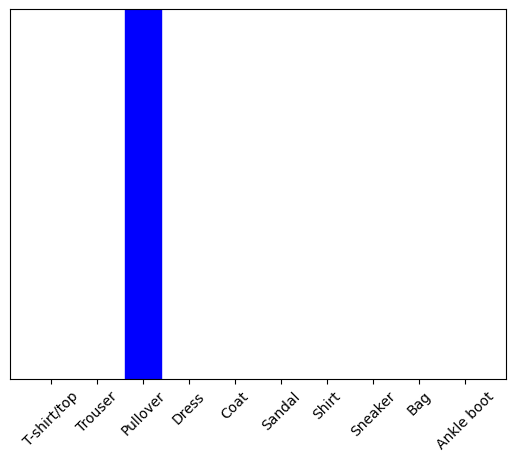

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

2